# Exploratory Data Analysis for Employee Attrition

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import joblib

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Prepare the Dataset
1. Read Excel file
2. Label data for employees who departed (1) and employees who remain (0)
3. Concatenate dataframes to one dataset

In [2]:
excelfile = pd.ExcelFile("../case_study.xlsx")

In [3]:
existing_df = excelfile.parse('Existing employees')
existing_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [4]:
departed_df = excelfile.parse("Employees who have left")
departed_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [8]:
existing_df['attrition'] = 0
existing_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [9]:
departed_df['attrition'] = 1
departed_df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


In [12]:
data = pd.concat([existing_df, departed_df], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition
0,501,0.91,0.84,5,265,5,0,0,technical,medium,1
1,10996,0.67,0.49,3,224,3,0,0,IT,low,0
2,2619,0.60,0.85,3,172,2,0,0,sales,low,0
3,12866,0.53,0.96,4,272,2,0,0,support,low,0
4,9790,0.92,0.91,3,202,2,0,0,sales,medium,0


In [13]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  attrition              14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [16]:
data.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,attrition
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [17]:
data.describe(include = ['O'])

,dept,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [18]:
data.drop(labels=['Emp ID'], axis=1, inplace=True)

In [19]:
data.to_csv('attrition.csv', index=False)

## Data Exploration

In [20]:
target = 'attrition'

In [21]:
vars_num = [c for c in data.columns if data[c].dtypes!='O' and c!=target]

vars_cat = [c for c in data.columns if data[c].dtypes=='O']

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 7
Number of categorical variables: 2


### Find missing values

In [22]:
# first in numerical variables

data[vars_num].isnull().mean()

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
promotion_last_5years    0.0
dtype: float64

In [23]:
# now in categorical variables

data[vars_cat].isnull().mean()

dept      0.0
salary    0.0
dtype: float64

### Determine Cardinality in categorical features

In [24]:
data[vars_cat].nunique()

dept      10
salary     3
dtype: int64

### Determine distribution of numerical features

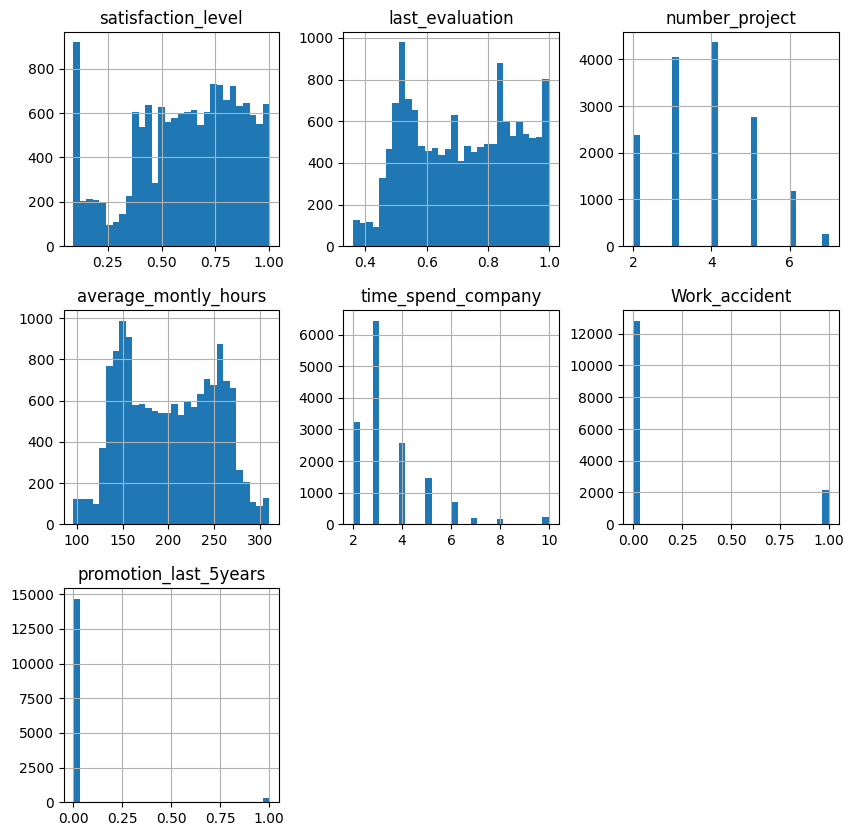

In [25]:
data[vars_num].hist(bins=30, figsize=(10,10))
plt.show()